In [1]:
#animate.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 18 October 2017.
#show animation of ring with breathing mode

In [42]:
#get plotting packages
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import numpy as np

In [43]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)

In [44]:
#pad array longitudinally
def pad_array(t, longitudes=False):
    Nr, Nt = t.shape
    tp = np.zeros((Nr, Nt+2))
    tp[:, 1:-1] = t
    if (longitudes == True):
        offset = 2.0*np.pi
    else:
        offset = 0.0
    tp[:, 0] = t[:, -1] - offset
    tp[:, -1] = t[:, 0] + offset
    return tp

In [45]:
#this returns tuple of plot's xy=(x[i],y[i]) coordinates
def xyt(i):
    ri = r[i]
    ti = t[i]
    tp = pad_array(ti, longitudes=True)
    rp = pad_array(ri, longitudes=False)
    x = tp/np.pi
    y = rp - 1.0
    y_mid = y[len(y)/2].copy()
    for ys in y:
        ys -= y_mid
    tm = times[i]/(2.0*np.pi)
    return (x, y, tm)

In [46]:
#this iterator provides the animation's xyt coordinates
def update():
    for idx in range(len(times)):
        yield xyt(idx)

In [47]:
#draw frame
def draw(xyt):
    x, y, tm = xyt
    ax.set_title('t = ' + str(tm)[0:4] + ' orbits')
    for idx in range(len(x)):
        line = lines[idx]
        line.set_data(x[idx], y[idx])
    return lines

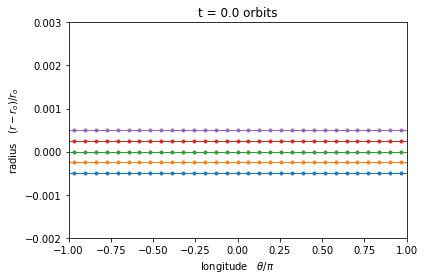

In [48]:
#show animation
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1, 1), ylim=(-0.002, 0.003), 
    xlabel='longitude   $\\theta/\pi$', ylabel='radius   $(r - r_o)/r_o$', title='t = 0.0')
x, y, tm = xyt(0)
ax.set_title('t = ' + str(tm))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
lines = [ax.plot([],[], 'o-', markersize=3, color=colors[idx], linewidth=1)[0]
    for idx in range(number_of_streamlines)]
for line in lines:
    line.set_data([],[])
ani = animation.FuncAnimation(fig, draw, update, interval=1, blit=True, repeat=False)

In [50]:
HTML(ani.to_html5_video())

KeyError: u'ffmpeg'

In [34]:
ani.to_html5_video()

KeyError: u'ffmpeg'

In [36]:
ani

In [37]:
rc('animation', html='html5')

In [38]:
ani

KeyError: u'ffmpeg'